# Importing Libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import re
import string
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Importing Dataset

In [2]:
data = pd.read_csv("Datasets/yelp.csv")

# EDA

In [3]:
data.head()

,S.No,reviewText
0,1,"Unfortunately, the frustration of being Dr. Go..."
1,2,Been going to Dr. Goldberg for over 10 years. ...
2,1,I don't know what Dr. Goldberg was like before...
3,1,I'm writing this review to give you a heads up...
4,2,All the food is great here. But the best thing...


In [4]:
data.isnull().sum()

S.No          0
reviewText    0
dtype: int64

In [5]:
data = data.dropna()

In [6]:
data.isnull().sum()

S.No          0
reviewText    0
dtype: int64

# Data Visualization

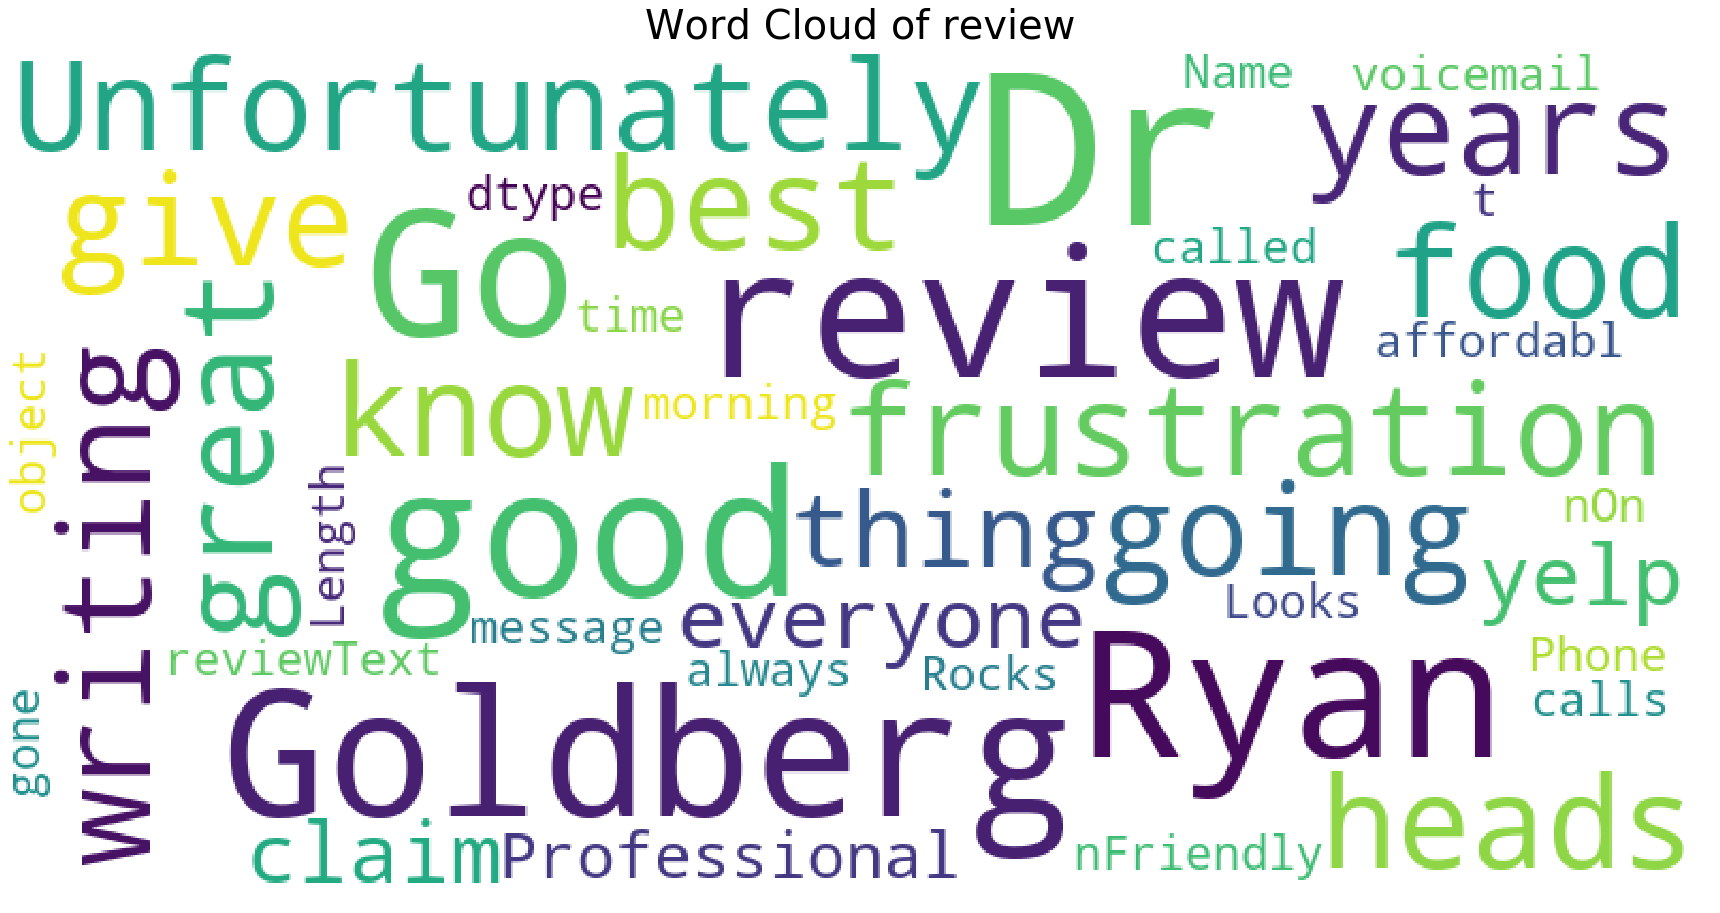

In [7]:
 
from wordcloud import WordCloud, STOPWORDS


def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='white',
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(data["reviewText"], title="Word Cloud of review")

# Data Cleaning 

In [8]:
data['reviewText'][1]

"Been going to Dr. Goldberg for over 10 years. I think I was one of his 1st patients when he started at MHMG. He's been great over the years and is really all about the big picture. It is because of him, not my now former gyn Dr. Markoff, that I found out I have fibroids. He explores all options with you and is very patient and understanding. He doesn't judge and asks all the right questions. Very thorough and wants to be kept in the loop on every aspect of your medical health and your life."

In [9]:
# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
data['reviewText'] = data['reviewText'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

In [10]:
data['reviewText'][1]

'been going to dr  goldberg for over   years  i think i was one of his   patients when he started at mhmg  he s been great over the years and is really all about the big picture  it is because of him  not my now former gyn dr  markoff  that i found out i have fibroids  he explores all options with you and is very patient and understanding  he doesn t judge and asks all the right questions  very thorough and wants to be kept in the loop on every aspect of your medical health and your life '

# NLP

In [11]:
sid = SentimentIntensityAnalyzer()

In [12]:
data['scores'] = data['reviewText'].apply(lambda reviewText: sid.polarity_scores(reviewText))

In [13]:
data

,S.No,reviewText,scores
0,1,unfortunately the frustration of being dr go...,"{'neg': 0.112, 'neu': 0.865, 'pos': 0.022, 'co..."
1,2,been going to dr goldberg for over years i...,"{'neg': 0.0, 'neu': 0.959, 'pos': 0.041, 'comp..."
2,1,i don t know what dr goldberg was like before...,"{'neg': 0.135, 'neu': 0.78, 'pos': 0.085, 'com..."
3,1,i m writing this review to give you a heads up...,"{'neg': 0.053, 'neu': 0.884, 'pos': 0.063, 'co..."
4,2,all the food is great here but the best thing...,"{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'comp..."
...,...,...,...
559995,2,ryan was as good as everyone on yelp has claim...,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp..."
559996,2,professional nfriendly non time and affordabl...,"{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'comp..."
559997,1,phone calls always go to voicemail and message...,"{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp..."
559998,1,looks like all of the good reviews have gone t...,"{'neg': 0.025, 'neu': 0.871, 'pos': 0.104, 'co..."


In [14]:
data['compound']  = data['scores'].apply(lambda score_dict: score_dict['compound'])

In [15]:
data

,S.No,reviewText,scores,compound
0,1,unfortunately the frustration of being dr go...,"{'neg': 0.112, 'neu': 0.865, 'pos': 0.022, 'co...",-0.8916
1,2,been going to dr goldberg for over years i...,"{'neg': 0.0, 'neu': 0.959, 'pos': 0.041, 'comp...",0.6249
2,1,i don t know what dr goldberg was like before...,"{'neg': 0.135, 'neu': 0.78, 'pos': 0.085, 'com...",-0.9358
3,1,i m writing this review to give you a heads up...,"{'neg': 0.053, 'neu': 0.884, 'pos': 0.063, 'co...",0.3102
4,2,all the food is great here but the best thing...,"{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'comp...",0.9956
...,...,...,...,...
559995,2,ryan was as good as everyone on yelp has claim...,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...",0.9382
559996,2,professional nfriendly non time and affordabl...,"{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'comp...",0.4019
559997,1,phone calls always go to voicemail and message...,"{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp...",0.4168
559998,1,looks like all of the good reviews have gone t...,"{'neg': 0.025, 'neu': 0.871, 'pos': 0.104, 'co...",0.7845


In [16]:
data['label'] = data['compound'].apply(lambda c: 'pos' if c >=0 else 'neg')

In [17]:
data

,S.No,reviewText,scores,compound,label
0,1,unfortunately the frustration of being dr go...,"{'neg': 0.112, 'neu': 0.865, 'pos': 0.022, 'co...",-0.8916,neg
1,2,been going to dr goldberg for over years i...,"{'neg': 0.0, 'neu': 0.959, 'pos': 0.041, 'comp...",0.6249,pos
2,1,i don t know what dr goldberg was like before...,"{'neg': 0.135, 'neu': 0.78, 'pos': 0.085, 'com...",-0.9358,neg
3,1,i m writing this review to give you a heads up...,"{'neg': 0.053, 'neu': 0.884, 'pos': 0.063, 'co...",0.3102,pos
4,2,all the food is great here but the best thing...,"{'neg': 0.0, 'neu': 0.538, 'pos': 0.462, 'comp...",0.9956,pos
...,...,...,...,...,...
559995,2,ryan was as good as everyone on yelp has claim...,"{'neg': 0.0, 'neu': 0.759, 'pos': 0.241, 'comp...",0.9382,pos
559996,2,professional nfriendly non time and affordabl...,"{'neg': 0.0, 'neu': 0.863, 'pos': 0.137, 'comp...",0.4019,pos
559997,1,phone calls always go to voicemail and message...,"{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp...",0.4168,pos
559998,1,looks like all of the good reviews have gone t...,"{'neg': 0.025, 'neu': 0.871, 'pos': 0.104, 'co...",0.7845,pos


# Model Building 

In [18]:
X = data['reviewText']
y = data['label']

In [19]:
X

0         unfortunately  the frustration of being dr  go...
1         been going to dr  goldberg for over   years  i...
2         i don t know what dr  goldberg was like before...
3         i m writing this review to give you a heads up...
4         all the food is great here  but the best thing...
                                ...                        
559995    ryan was as good as everyone on yelp has claim...
559996    professional  nfriendly non time and affordabl...
559997    phone calls always go to voicemail and message...
559998    looks like all of the good reviews have gone t...
559999    ryan rocks  i called him this morning for some...
Name: reviewText, Length: 560000, dtype: object

In [20]:
y

0         neg
1         pos
2         neg
3         pos
4         pos
         ... 
559995    pos
559996    pos
559997    pos
559998    pos
559999    pos
Name: label, Length: 560000, dtype: object

In [21]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(y)

In [22]:
y

array([0, 1, 0, ..., 1, 1, 1])

In [23]:
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(X).toarray()

In [24]:
joblib.dump(cv, "cv.pkl")

['cv.pkl']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [27]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

# Algorithms Used 

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)
predictions = LR.predict(X_test)
val1 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for LR: ", val1, "\n")
print("*Confusion Matrix for LR: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for LR: ")
print(classification_report(y_test, predictions))

C:\Users\Public\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


*Accuracy score for LR:  89.58392857142857 

*Confusion Matrix for LR: 
[[16403  7637]
 [ 4029 83931]]
*Classification Report for LR: 
              precision    recall  f1-score   support

           0       0.80      0.68      0.74     24040
           1       0.92      0.95      0.94     87960

    accuracy                           0.90    112000
   macro avg       0.86      0.82      0.84    112000
weighted avg       0.89      0.90      0.89    112000



# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
val2 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for RF: ", val2, "\n")
print("*Confusion Matrix for RF: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for RF: ")
print(classification_report(y_test, predictions))

*Accuracy score for RF:  85.96160714285715 

*Confusion Matrix for RF: 
[[10695 13345]
 [ 2378 85582]]
*Classification Report for RF: 
              precision    recall  f1-score   support

           0       0.82      0.44      0.58     24040
           1       0.87      0.97      0.92     87960

    accuracy                           0.86    112000
   macro avg       0.84      0.71      0.75    112000
weighted avg       0.86      0.86      0.84    112000



# Naive Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)
predictions = GNB.predict(X_test)
val3 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for GNB: ", val3, "\n")
print("*Confusion Matrix for GNB: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for GNB: ")
print(classification_report(y_test, predictions))

*Accuracy score for GNB:  66.91607142857143 

*Confusion Matrix for GNB: 
[[20185  3855]
 [33199 54761]]
*Classification Report for GNB: 
              precision    recall  f1-score   support

           0       0.38      0.84      0.52     24040
           1       0.93      0.62      0.75     87960

    accuracy                           0.67    112000
   macro avg       0.66      0.73      0.63    112000
weighted avg       0.81      0.67      0.70    112000



# SVM

In [31]:
from sklearn.svm import LinearSVC
SVM = LinearSVC(random_state=0, tol=1e-5)
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
val4 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for SVM: ", val4, "\n")
print("*Confusion Matrix for SVM: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for SVM: ")
print(classification_report(y_test, predictions))

C:\Users\Public\anaconda\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


*Accuracy score for SVM:  89.35089285714287 

*Confusion Matrix for SVM: 
[[16943  7097]
 [ 4830 83130]]
*Classification Report for SVM: 
              precision    recall  f1-score   support

           0       0.78      0.70      0.74     24040
           1       0.92      0.95      0.93     87960

    accuracy                           0.89    112000
   macro avg       0.85      0.82      0.84    112000
weighted avg       0.89      0.89      0.89    112000



# Voting Classifier

In [32]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
estimator = []
estimator.append(('RF', 
                  RandomForestClassifier()))
estimator.append(('SVC', LinearSVC(random_state=0, tol=1e-5)))
estimator.append(('GNB', GaussianNB()))
estimator.append(('LR', LogisticRegression()))


  
# Voting Classifier with hard voting
vot_hard = VotingClassifier(estimators = estimator, voting ='hard')
vot_hard.fit(X_train, y_train)
predictions = vot_hard.predict(X_test)
  
val5 = (accuracy_score(y_test, predictions)*100)
print("*Accuracy score for Voting Classifier: ", val5, "\n")
print("*Confusion Matrix for Voting Classifier: ")
print(confusion_matrix(y_test, predictions))
print("*Classification Report for Voting Classifier: ")
print(classification_report(y_test, predictions))

C:\Users\Public\anaconda\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
C:\Users\Public\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


*Accuracy score for Voting Classifier:  89.24285714285715 

*Confusion Matrix for Voting Classifier: 
[[17628  6412]
 [ 5636 82324]]
*Classification Report for Voting Classifier: 
              precision    recall  f1-score   support

           0       0.76      0.73      0.75     24040
           1       0.93      0.94      0.93     87960

    accuracy                           0.89    112000
   macro avg       0.84      0.83      0.84    112000
weighted avg       0.89      0.89      0.89    112000



# Accuracy Comparison

In [33]:
score = [val1,val2,val3,val4,val5]
classifier = ('Logistic Regression', 'Random Forest', 'Naive Bayes','SVM','Voting Classifier')
y_pos = np.arange(len(classifier))
print(y_pos)
print(score)

[0 1 2 3 4]
[89.58392857142857, 85.96160714285715, 66.91607142857143, 89.35089285714287, 89.24285714285715]


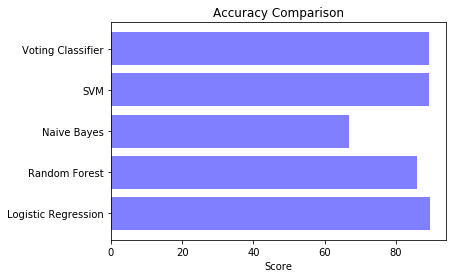

In [34]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, score, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Score')
plt2.title('Accuracy Comparison')
plt2.show()

# Logistic Regression got the highest Accuracy 

In [35]:
joblib.dump(LR, "model.pkl")

['model.pkl']